### Investiagating use of the word cloud library to make interesting graphics

#### Step 1: Get some text to plot from

In [18]:
import urllib
from bs4 import BeautifulSoup

url = "http://seismo.berkeley.edu/seismo.overview.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()
    
# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)[880:-344]

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/rmartinshort/anaconda/envs/py36/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


##### Make a really straightforward workcloud from this text. Evidently the size of the word is determined by the number of times that it appears in the text

In [49]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
import matplotlib.pyplot as plt

In [34]:
# Generate a word cloud image
wordcloud = WordCloud(max_words=100,background_color='black',width=500,height=500).generate(text)

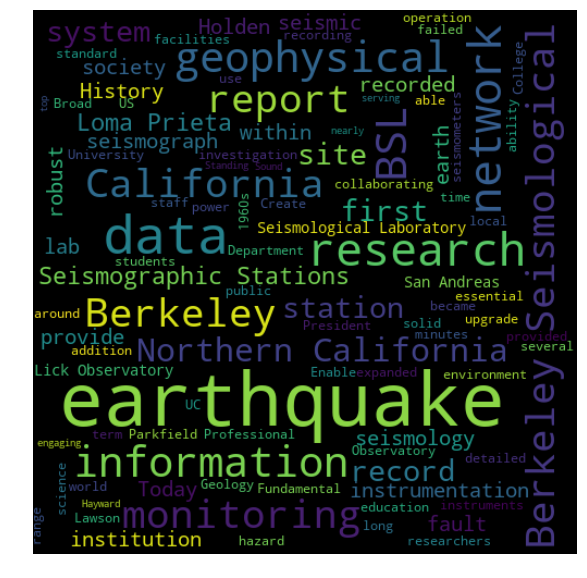

In [35]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Its also possible to create wordclouds in arbitary shapes using the mask functionality

In [39]:
from PIL import Image
import numpy as np

In [92]:
CA_image = np.array(Image.open("california_outline.bmp"))

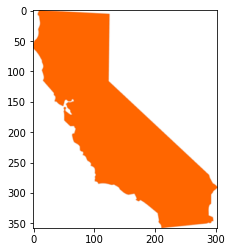

In [93]:
plt.imshow(CA_image,interpolation='bilinear')

In [98]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white",max_words=200,mask=CA_image,stopwords=stopwords).generate(text)

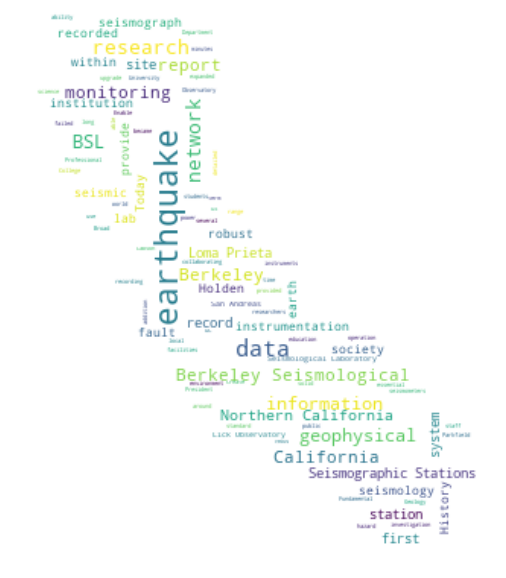

In [101]:
figure = plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(CA_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()